In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install pyarrow==18.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install snowflake-connector-python pandas sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade snowflake-sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.4 MB/s eta 0:00:00


In [5]:
import snowflake.sqlalchemy
print("Snowflake SQLAlchemy installed successfully!")

Snowflake SQLAlchemy installed successfully!


In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [7]:
import snowflake.connector
from sqlalchemy import create_engine
import urllib.parse
import json
import pandas as pd

# Load secrets from Kaggle
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secrets = json.loads(user_secrets.get_secret("snowflake"))  
user = secrets.get("SNOWFLAKE_USER")
password = secrets.get("SNOWFLAKE_PASSWORD")

# Snowflake credentials
account = "HWXSBYU-JU26328"
role = "ACCOUNTADMIN"
warehouse = "COMPUTE_WH"
database = "TRANSPORT_DATA"
schema = "PUBLIC"

# URL encode the password (important if it contains special characters like @, !, etc.)
encoded_password = urllib.parse.quote(password)

connection_string = f"snowflake://{user}:{encoded_password}@{account}/{database}/{schema}?warehouse={warehouse}&role={role}"
engine = create_engine(connection_string)

try:
    # Test Connection
    conn = engine.connect()
    print("Connected to Snowflake successfully!")
    
    # Query data from Snowflake
    query = 'SELECT * FROM TRANSPORT_DATA.PUBLIC."Transport_Details";'
    # Process data in chunks
    chunks = []  # List to store chunks

    for chunk in pd.read_sql(query, engine, chunksize=100):
        chunks.append(chunk)

    # Combine all chunks into a single DataFrame
    df = pd.concat(chunks, ignore_index=True)

    # Rename columns
    df.rename(columns={"party": "PARTY", "gc": "GC", "fright": "FRIGHT","total": "TOTAL"}, inplace=True)

    # Close the connection
    conn.close()
    print('Connection closed')

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Dispose of the engine if necessary
    engine.dispose()
    print('Engine disposed')


Connected to Snowflake successfully!
Connection closed
Engine disposed


In [8]:
# Display dataframe
df.head()

,LO DATE,UN DATE,PARTY,VECHILE NO,GC,L.W,FRIGHT,TOTAL,LO_year,UN_year,LO_month,UN_month,LO_day,UN_day
0,2022-11-15,2022-11-17,M/S JEEVAKA NETTING,TS07UF4929,132,51.75,900,46575.0,2022,2022,11,11,15,17
1,2022-11-11,2022-11-15,M/S JEEVAKA NETTING,TS06UA4712,3,48.99,900,44091.0,2022,2022,11,11,11,15
2,2022-11-12,2022-11-15,M/S JEEVAKA NETTING,TS07UA9099,12,46.94,900,42246.0,2022,2022,11,11,12,15
3,2022-11-12,2022-11-13,M/S JEEVAKA NETTING,TS06UC7272,13,55.31,900,49779.0,2022,2022,11,11,12,13
4,2022-11-14,2022-11-16,M/S SUSHMA SALES,TS07UA3339,36,48.57,900,43713.0,2022,2022,11,11,14,16


<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2022'}, xlabel='LO_month', ylabel='count'>

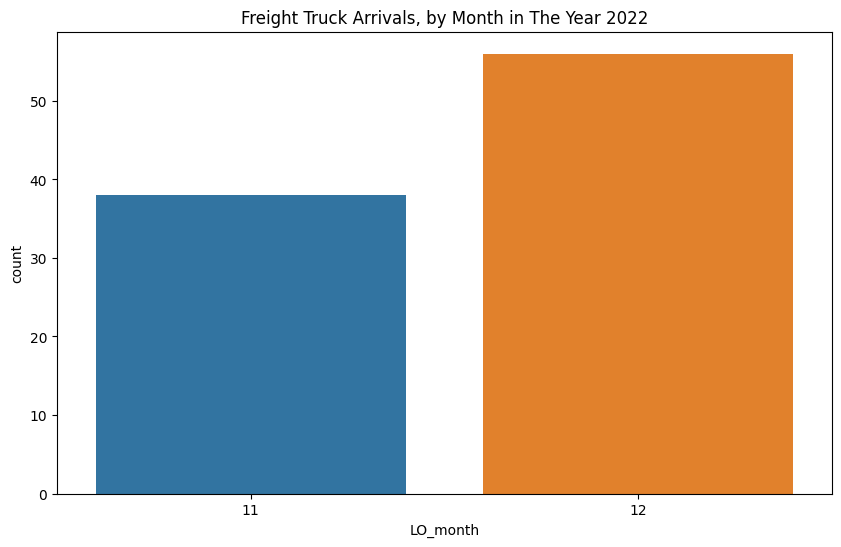

In [9]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2022")
df_2022 = df[df['LO_year'] == 2022]
sns.countplot(x=df_2022['LO_month'])

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2023'}, xlabel='LO_month', ylabel='count'>

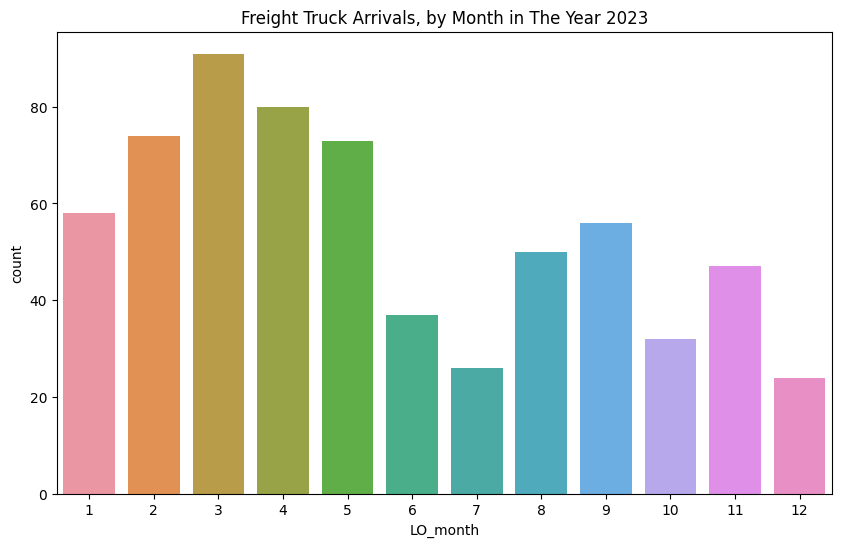

In [10]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2023")
df_2023 = df[df['LO_year'] == 2023]
sns.countplot(x=df_2023['LO_month'])

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2024'}, xlabel='LO_month', ylabel='count'>

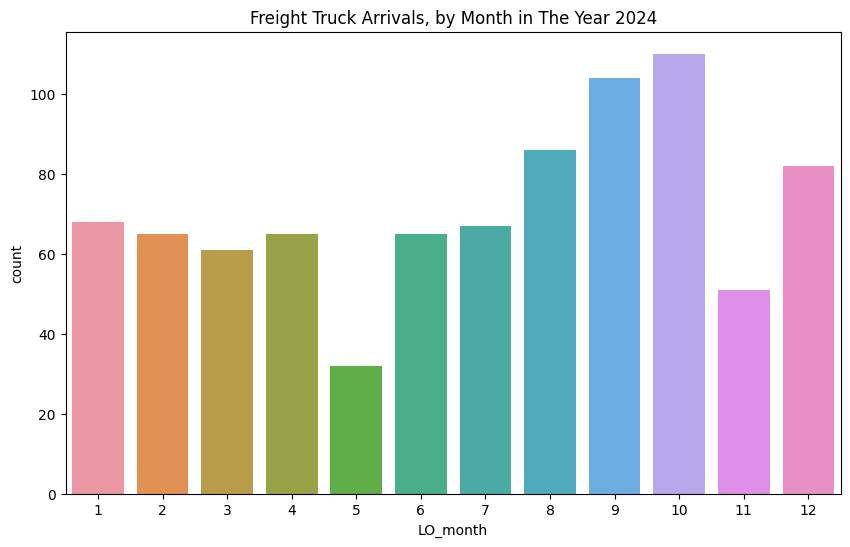

In [11]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2024")
df_2024 = df[df['LO_year'] == 2024]
sns.countplot(x=df_2024['LO_month'])

<Axes: title={'center': 'Freight Truck Arrivals, by Month in The Year 2025'}, xlabel='LO_month', ylabel='count'>

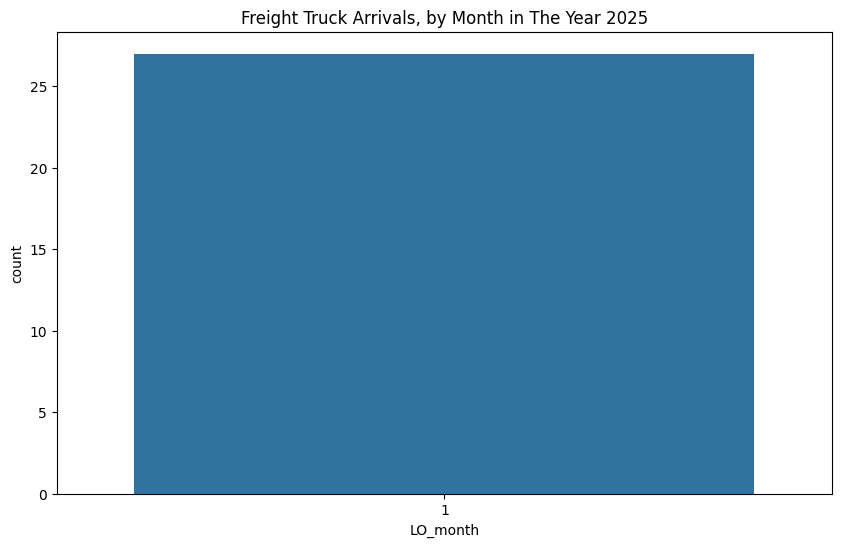

In [12]:
plt.figure(figsize=(10,6))
plt.title("Freight Truck Arrivals, by Month in The Year 2025")
df_2025 = df[df['LO_year'] == 2025]
sns.countplot(x=df_2025['LO_month'])

In [13]:
import ipywidgets as widgets
from IPython.display import display

# Get unique years from the dataset
unique_years = sorted(df['LO_year'].unique())

# Create a dropdown widget
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  # Default value
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Function to update the plot
def plot_data(YEAR):
    plt.figure(figsize=(10,6))
    plt.title(f"Freight Truck Arrivals, by Month in The Year {YEAR}")
    df_YEAR = df[df['LO_year'] == YEAR]
    sns.countplot(data=df_YEAR, x="LO_month")
    plt.show()

# Use an interactive widget to update the graph when dropdown changes
interactive_plot = widgets.interactive(plot_data, YEAR=year_dropdown)

# Display only the interactive widget (removes duplicate dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', options=(2022, 2023, 2024, 2025), style=Description…

<Axes: title={'center': 'Freight Truck Arrivals,  in The Year'}, xlabel='LO_year', ylabel='count'>

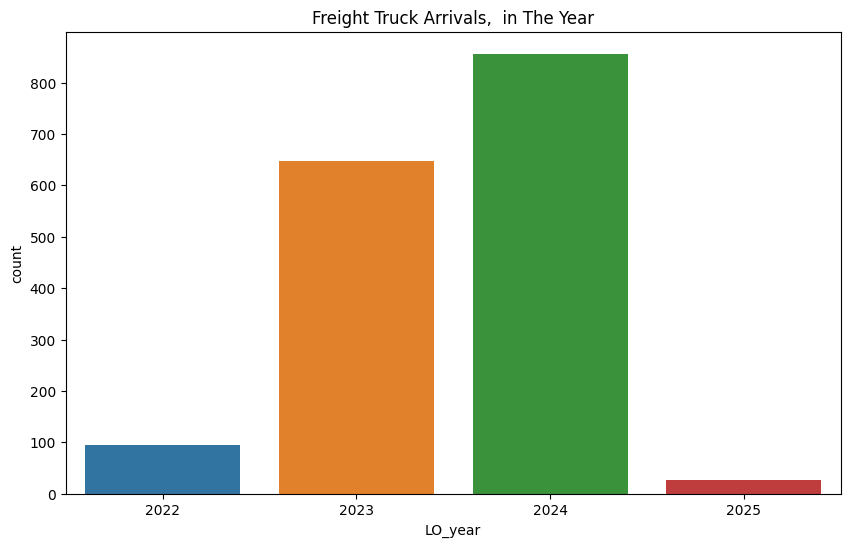

In [14]:
plt.figure(figsize=(10,6))
plt.title(f"Freight Truck Arrivals,  in The Year")
sns.countplot(data=df,x="LO_year")

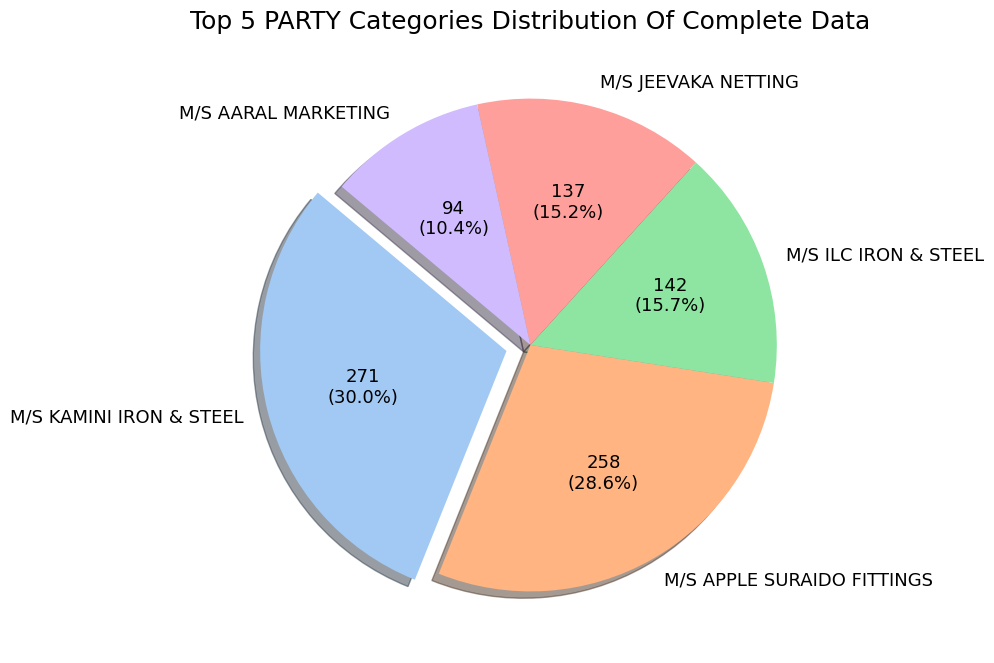

In [15]:
party_counts = df['PARTY'].value_counts().head()

labels = party_counts.index
sizes = party_counts.values

# Define Seaborn color palette (matching the number of labels)
colors = sns.color_palette("pastel", len(labels))
# Create an "explode" effect (only explode the largest category)
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]
# function to show count and percentage
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))  # Convert percentage to count
    return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct=lambda pct: autopct_format(pct, sizes), 
    colors=colors, 
    explode=explode,
    startangle=140, 
    shadow=True,
    textprops={'fontsize': 13}  # Set font size for labels
)
plt.title("Top 5 PARTY Categories Distribution Of Complete Data", fontsize=18)
plt.show()

In [16]:
# Get unique years from the dataset
unique_years = sorted(df['LO_year'].unique())

# Create a dropdown widget
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR):
    party_counts = df[df['LO_year'] == YEAR]['PARTY'].value_counts().head()

    # Extract labels and sizes
    labels = party_counts.index
    sizes = party_counts.values

    # Define Seaborn color palette
    colors = sns.color_palette("pastel", len(labels))

    # Create an "explode" effect (only explode the largest category)
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_format(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  # Set font size for labels
    )
    plt.title(f"Top 5 PARTY Categories Distribution in {YEAR}", fontsize=18)
    plt.show()

# Event Handling
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Year:', options=(2022, 2023, 2024, 2025), style=Description…

In [17]:
"""

# Get unique months and years from the dataset
unique_months = sorted(df['LO_month'].unique())  # Fixed variable name
unique_years = sorted(df['LO_year'].unique())

# Create dropdown widgets
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[0],  # Default year
    description='Select Year:',
    style={'description_width': 'initial'}
)

month_dropdown = widgets.Dropdown(
    options=unique_months,  # Fixed: using unique_months
    value=unique_months[0],  # Default month
    description='Select Month:',  # Fixed: Correct description
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR, MONTH):
    # Filter DataFrame for the given year and month
    party_counts = df[(df['LO_year'] == YEAR) & (df['LO_month'] == MONTH)]['PARTY'].value_counts().head()
    
    # If no data is available for the selected month, avoid errors
    if party_counts.empty:
        print(f"No data available for Year: {YEAR}, Month: {MONTH}")
        return
    
    # Extract labels and sizes
    labels = party_counts.index
    sizes = party_counts.values
    
    # Define Seaborn color palette (matching the number of labels)
    colors = sns.color_palette("pastel", len(labels))

    # Create an "explode" effect (only explode the largest category)
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_format(pct, all_vals):
        absolute = int(round(pct/100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"  # Show both count and percentage

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_format(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  # Set font size for labels
    )
    plt.title(f"Top 5 PARTY Categories Distribution for {MONTH}/{YEAR}", fontsize=18)
    plt.show()

# Interactive widget to update the plot when dropdown changes
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown, MONTH=month_dropdown)
display(interactive_plot)"""


'\n\n# Get unique months and years from the dataset\nunique_months = sorted(df[\'LO_month\'].unique())  # Fixed variable name\nunique_years = sorted(df[\'LO_year\'].unique())\n\n# Create dropdown widgets\nyear_dropdown = widgets.Dropdown(\n    options=unique_years,\n    value=unique_years[0],  # Default year\n    description=\'Select Year:\',\n    style={\'description_width\': \'initial\'}\n)\n\nmonth_dropdown = widgets.Dropdown(\n    options=unique_months,  # Fixed: using unique_months\n    value=unique_months[0],  # Default month\n    description=\'Select Month:\',  # Fixed: Correct description\n    style={\'description_width\': \'initial\'}\n)\n\n# Function to plot the pie chart\ndef plot_pie(YEAR, MONTH):\n    # Filter DataFrame for the given year and month\n    party_counts = df[(df[\'LO_year\'] == YEAR) & (df[\'LO_month\'] == MONTH)][\'PARTY\'].value_counts().head()\n    \n    # If no data is available for the selected month, avoid errors\n    if party_counts.empty:\n        prin

In [18]:


month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}


unique_months = sorted(df['LO_month'].unique())  
unique_years = sorted(df['LO_year'].unique())


month_options = {month_mapping[m]: m for m in unique_months}

# Create dropdown widgets
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[1],  # Default year
    description='Select Year:',
    style={'description_width': 'initial'}
)

month_dropdown = widgets.Dropdown(
    options=month_options,  # Display month names but return numbers
    value=unique_months[1],  # Default month
    description='Select Month:',
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_pie(YEAR, MONTH):
    # Filter DataFrame for the given year and month
    party_counts = df[(df['LO_year'] == YEAR) & (df['LO_month'] == MONTH)]['PARTY'].value_counts()
    if party_counts.empty:
        print(f"No data available for {month_mapping[MONTH]} {YEAR}")
        return
    labels = party_counts.index
    sizes = party_counts.values
    

    colors = sns.color_palette("pastel", len(labels))

    
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

    # Function to show count and percentage
    def autopct_form(pct, all_vals):
        absolute = int(round(pct / 100. * sum(all_vals)))  # Convert percentage to count
        return f"{absolute}\n({pct:.1f}%)"

    # Create pie chart
    plt.figure(figsize=(14, 14))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct=lambda pct: autopct_form(pct, sizes), 
        colors=colors, 
        explode=explode,
        startangle=140, 
        shadow=True,
        textprops={'fontsize': 13}  
    )
    plt.title(f"Top 5 PARTY Categories Distribution for {month_mapping[MONTH]} {YEAR}", fontsize=18)
    plt.show()

# Event Handling
interactive_plot = widgets.interactive(plot_pie, YEAR=year_dropdown, MONTH=month_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Year:', index=1, options=(2022, 2023, 2024, 2025), style=De…

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

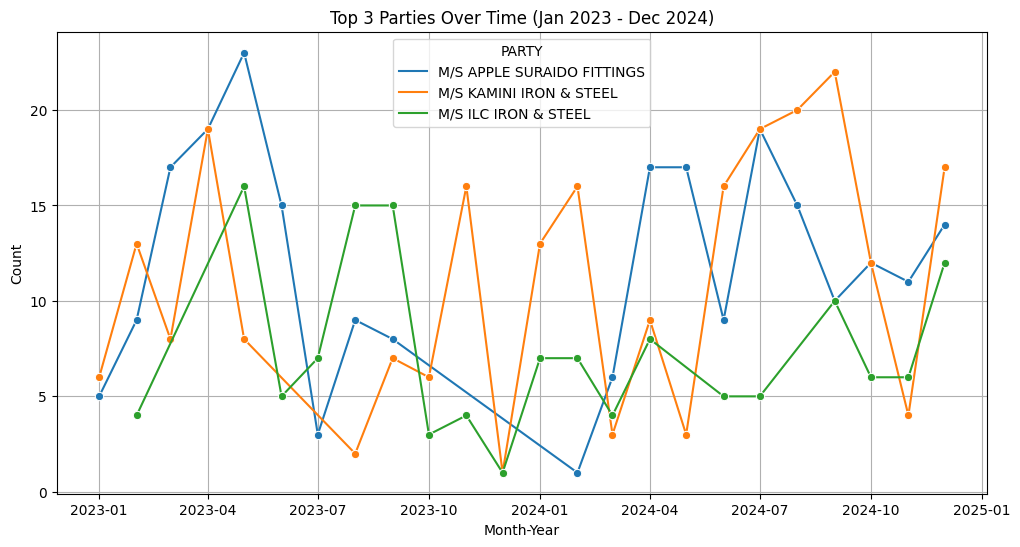

In [19]:
# Create a datetime column combining LO_year and LO_month
df["Date"] = pd.to_datetime(df["LO_year"].astype(str) + "-" + df["LO_month"].astype(str), format="%Y-%m")

# Get the top 5 parties based on their total count across all years
top_parties = df["PARTY"].value_counts().head(3).index  

# Filter dataset for only those top parties and between Jan 2023 - Dec 2024
df_filtered = df[(df["PARTY"].isin(top_parties)) & (df["Date"].between("2023-01", "2024-12"))]

# Count occurrences per month per party
df_counts = df_filtered.groupby(["Date", "PARTY"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x="Date", y="Count", hue="PARTY", marker="o")



# Labels and Title
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Top 3 Parties Over Time (Jan 2023 - Dec 2024)")
plt.grid(True)

plt.show()

In [20]:
print(df_filtered.head())


       LO DATE    UN DATE                       PARTY  VECHILE NO    GC  \
93  2023-01-06 2023-01-08     M/S KAMINI IRON & STEEL  AP28TD0788  2909   
97  2023-01-05 2023-01-06     M/S KAMINI IRON & STEEL  TS07UH4586  2898   
100 2023-01-05 2023-01-07  M/S APPLE SURAIDO FITTINGS  TS07UH4179  2956   
102 2023-01-06 2023-01-10  M/S APPLE SURAIDO FITTINGS  TS07UH2949  2921   
104 2023-01-07 2023-01-09     M/S KAMINI IRON & STEEL   AP29V3987  2916   

       L.W  FRIGHT    TOTAL  LO_year  UN_year  LO_month  UN_month  LO_day  \
93   45.62     900  41058.0     2023     2023         1         1       6   
97   44.74     900  40266.0     2023     2023         1         1       5   
100  45.66    1000  45660.0     2023     2023         1         1       5   
102  45.63     900  41067.0     2023     2023         1         1       6   
104  38.06     900  34254.0     2023     2023         1         1       7   

     UN_day       Date  
93        8 2023-01-01  
97        6 2023-01-01  
100       7

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

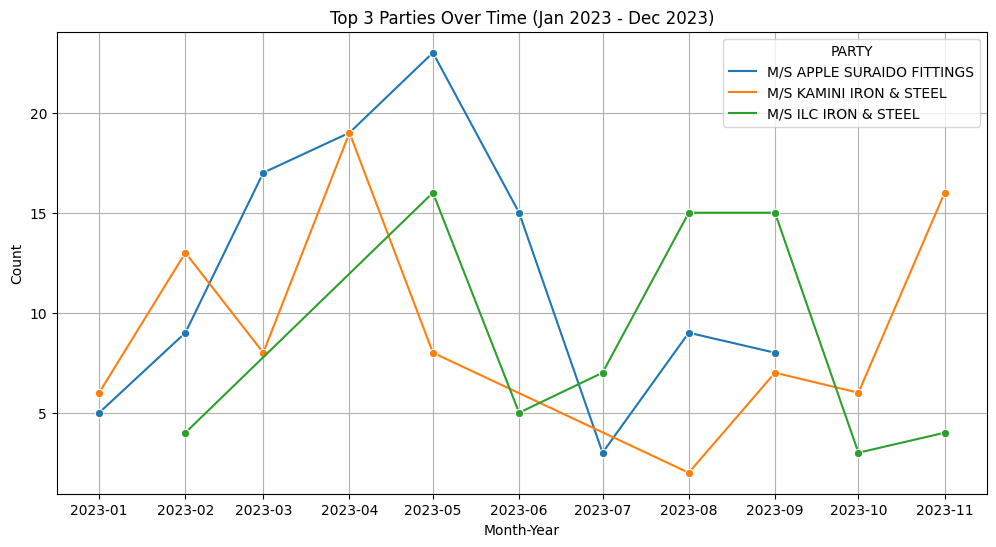

In [21]:

# Get the top 5 parties based on their total count across all years
top_parties = df["PARTY"].value_counts().head(3).index  

# Filter dataset for only those top parties and between Jan 2023 - Dec 2024
df_filtered = df[(df["PARTY"].isin(top_parties)) & (df["LO DATE"].between("2023-01", "2023-12"))]

# Count occurrences per month per party
df_counts = df_filtered.groupby(["Date", "PARTY"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x="Date", y="Count", hue="PARTY", marker="o")



# Labels and Title
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Top 3 Parties Over Time (Jan 2023 - Dec 2023)")
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

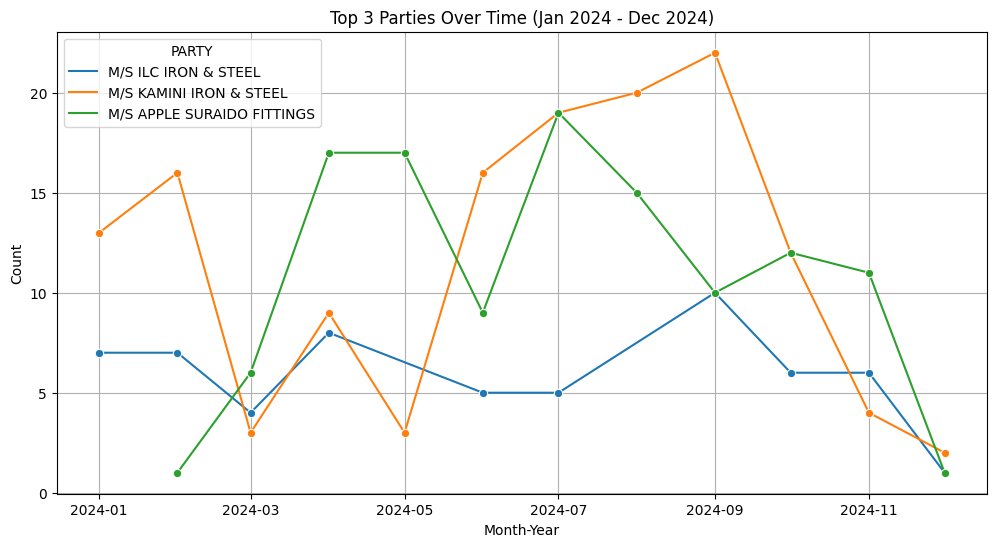

In [22]:

# Get the top 5 parties based on their total count across all years
top_parties = df["PARTY"].value_counts().head(3).index  

# Filter dataset for only those top parties and between Jan 2023 - Dec 2024
df_filtered = df[(df["PARTY"].isin(top_parties)) & (df["LO DATE"].between("2024-01", "2024-12"))]

# Count occurrences per month per party
df_counts = df_filtered.groupby(["Date", "PARTY"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x="Date", y="Count", hue="PARTY", marker="o")



# Labels and Title
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Top 3 Parties Over Time (Jan 2024 - Dec 2024)")
plt.grid(True)

plt.show()

In [23]:


month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}


unique_months = sorted(df['LO_month'].unique())  
unique_years = sorted(df['LO_year'].unique())


month_options = {month_mapping[m]: m for m in unique_months}

# Create dropdown widgets
year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[1],  # Default year
    description='Select Start Year:',
    style={'description_width': 'initial'}
)
end_year_dropdown = widgets.Dropdown(
    options=unique_years,
    value=unique_years[1],  # Default year
    description='Select End Year:',
    style={'description_width': 'initial'}
)

month_dropdown = widgets.Dropdown(
    options=month_options,  # Display month names but return numbers
    value=unique_months[1],  # Default month
    description='Select Start Month:',
    style={'description_width': 'initial'}
)
end_month_dropdown = widgets.Dropdown(
    options=month_options,  # Display month names but return numbers
    value=unique_months[11],  # Default month
    description='Select End Month:',
    style={'description_width': 'initial'}
)

# Function to plot the pie chart
def plot_LINE(YEAR, MONTH,END_YEAR,END_MONTH):
    # Filter DataFrame for the given year and month
    party_counts = df[(df['LO_year'] == YEAR) & (df['LO_month'] == MONTH)]['PARTY'].value_counts()
    if party_counts.empty:
        print(f"No data available for {month_mapping[MONTH]} {YEAR}")
        return
    top_parties = df["PARTY"].value_counts().head(3).index  
    df_filtered = df[(df["PARTY"].isin(top_parties)) & (df["LO DATE"].between(str(YEAR)+'-'+str(MONTH), str(END_YEAR)+'-'+str(END_MONTH)))]

    # Count occurrences per month per party
    df_counts = df_filtered.groupby(["Date", "PARTY"]).size().reset_index(name="Count")

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_counts, x="Date", y="Count", hue="PARTY", marker="o")



    # Labels and Title
    plt.xlabel("Month-Year")
    plt.ylabel("Count")
    plt.title(f"Top 3 PARTY Categories Distribution for {month_mapping[MONTH]} {YEAR}", fontsize=18)
    plt.grid(True)

    plt.show()

# Event Handling
interactive_plot = widgets.interactive(plot_LINE, YEAR=year_dropdown, MONTH=month_dropdown,END_YEAR=end_year_dropdown,END_MONTH=end_month_dropdown)
display(interactive_plot)



interactive(children=(Dropdown(description='Select Start Year:', index=1, options=(2022, 2023, 2024, 2025), st…